In [38]:
#Import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [39]:
# Display settings
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.max_rows", None)      # show all rows (careful if huge)
pd.set_option("display.width", None)         # don't wrap columns
pd.set_option("display.colheader_justify", "left")  # align nicely

In [40]:
# Load datasets
df=pd.read_csv("blinkit_orders.csv")
df1=pd.read_csv("blinkit_customers.csv")
df2=pd.read_csv("blinkit_customer_feedback.csv")
df3=pd.read_csv("blinkit_delivery_performance.csv")
df4=pd.read_csv("blinkit_inventory.csv")
df5=pd.read_csv("blinkit_inventoryNew.csv")
df6=pd.read_csv("blinkit_marketing_performance.csv")
df7=pd.read_csv("blinkit_order_items.csv")
df8=pd.read_csv("blinkit_products.csv")

In [41]:
# Adding the inventory Dataset
inv=pd.concat([df4, df5], ignore_index=True)

In [42]:
# Ensure datetime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['promised_delivery_time'] = pd.to_datetime(df['promised_delivery_time'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Difference in minutes
df['promised_minutes'] = (df['promised_delivery_time'] - df['order_date']).dt.total_seconds() / 60
df['actual_minutes'] = (df['actual_delivery_time'] - df['order_date']).dt.total_seconds() / 60
df['date'] = df['order_date'].dt.strftime('%b-%Y')     # Sep-2024

In [43]:
#Drop unecssary Columns
df.drop(['order_date','delivery_partner_id','store_id','promised_delivery_time', 'actual_delivery_time'], axis=1, inplace=True)
df1.drop(['customer_name', 'email', 'phone', 'address', 'area', 'pincode', 'registration_date'], axis=1, inplace=True)
df2.drop(['feedback_id','customer_id', 'rating', 'feedback_text','feedback_category','feedback_date'], axis=1, inplace=True)
df3.drop(['delivery_partner_id', 'promised_time', 'actual_time','delivery_time_minutes','delivery_status','reasons_if_delayed'], axis=1, inplace=True)
#df4.drop('date', axis=1, inplace=True)
#df5.drop('date', axis=1, inplace=True)
df7.drop('unit_price', axis=1, inplace=True)
df8.drop(['brand', 'price', 'mrp', 'product_name','shelf_life_days','min_stock_level', 'max_stock_level'], axis=1, inplace=True)


In [44]:
# Merge step by step
final = pd.merge(df, df1, how='outer', on='customer_id')
final = pd.merge(final, df2, how='outer', on='order_id')
final = pd.merge(final, df3, how='outer', on='order_id')
final = pd.merge(final, df7, how='outer', on='order_id')
final = pd.merge(final, df8, how='outer', on='product_id')
#final = pd.merge(final, df4, how='outer', on='product_id')
#final = pd.merge(final, df5, how='outer', on=['product_id','stock_received', 'damaged_stock'])

In [45]:
#Data Cleaning
final.dropna()
final.drop_duplicates()
final.reset_index(drop=True, inplace=True)

In [46]:
print(final.shape)
print(final.head(5))

(5328, 17)
   order_id      customer_id delivery_status    order_total payment_method  \
0  1.961864e+09  30065862              On Time  3197.07        Cash          
1  5.998036e+09  88324928              On Time  3279.72        Card          
2  4.926104e+09  47206881     Slightly Delayed  2029.88      Wallet          
3  3.475261e+09  57291761     Slightly Delayed  3819.84        Cash          
4  8.281094e+09  67277562              On Time   781.08        Cash          

   promised_minutes  actual_minutes date      customer_segment  total_orders  \
0  18.0              13.0            Jul-2024   Regular         13             
1  12.0              10.0            Feb-2024   Regular         13             
2  20.0              34.0            Oct-2023   Premium          3             
3  20.0              33.0            Mar-2023   Regular          8             
4  20.0              15.0            Feb-2024  Inactive         10             

   avg_order_value sentiment  distance_

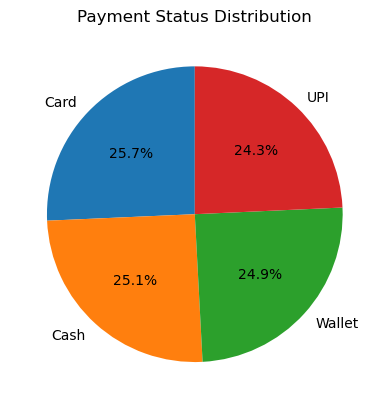

In [47]:
a=final['payment_method'].value_counts()
b=a.index
plt.pie(a, labels=b, autopct='%1.1f%%', startangle=90)
plt.title("Payment Status Distribution")
plt.show()

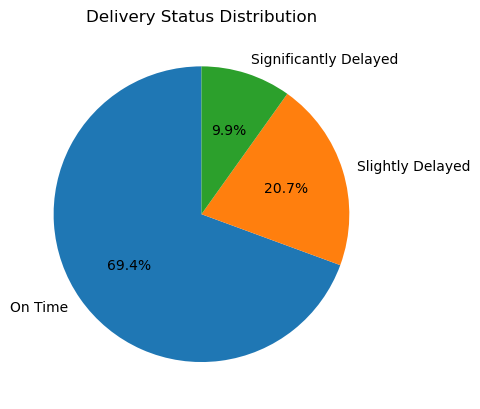

In [48]:
y = df['delivery_status'].value_counts()   # frequencies
l = y.index                                # labels in correct order
plt.pie(y, labels=l, autopct='%1.1f%%', startangle=90)
plt.title("Delivery Status Distribution")
plt.show()

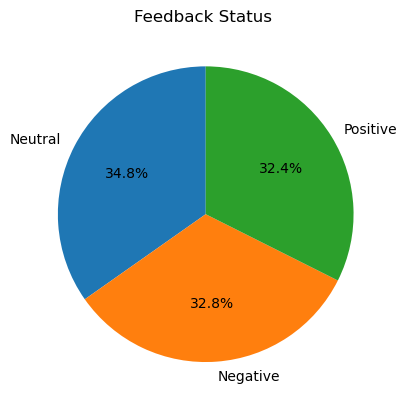

In [49]:
y = final['sentiment'].value_counts()   # frequencies
l = y.index                                # labels in correct order
plt.pie(y, labels=l, autopct='%1.1f%%', startangle=90)
plt.title("Feedback Status ")
plt.show()

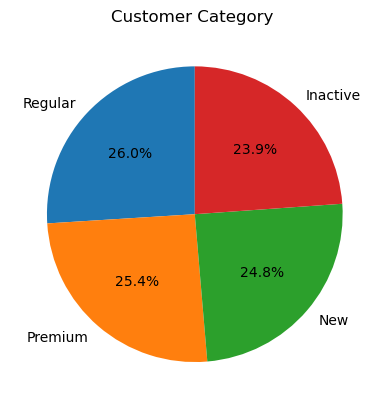

In [50]:
y = final['customer_segment'].value_counts()   # frequencies
l = y.index                                # labels in correct order
plt.pie(y, labels=l, autopct='%1.1f%%', startangle=90)
plt.title("Customer Category ")
plt.show()

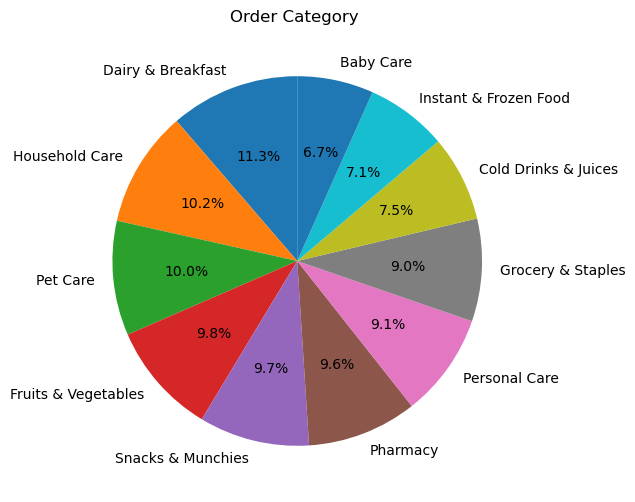

In [51]:
plt.figure(figsize=(8,6))
y = final['category'].value_counts()   # frequencies
l = y.index                                # labels in correct order
plt.pie(y, labels=l, autopct='%1.1f%%', startangle=90)
plt.title("Order Category ")
plt.show()

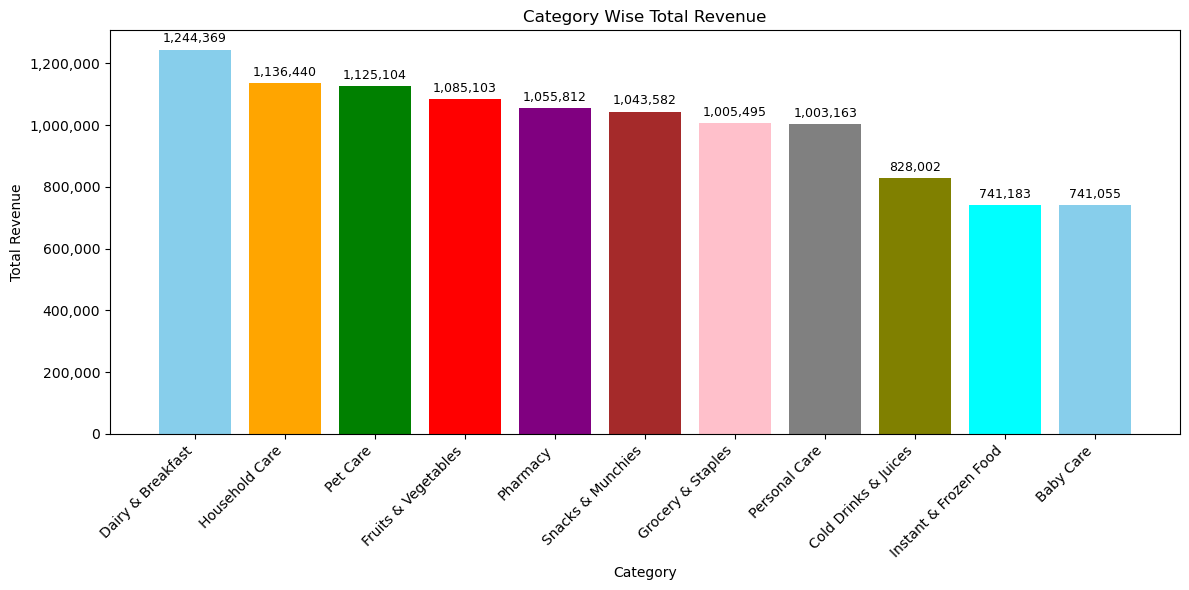

In [52]:
# Group by category and sum order total
category_revenue = final.groupby("category")["order_total"].sum().reset_index()
# Sort by revenue for better visualization
category_revenue = category_revenue.sort_values(by="order_total", ascending=False)

colors = [ "skyblue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]

plt.figure(figsize=(12,6))
bars = plt.bar(category_revenue["category"], category_revenue["order_total"], color=colors)

#Add labels right after creating bars
plt.bar_label(bars, labels=[f"{val:,.0f}" for val in category_revenue["order_total"]], padding=3, fontsize=9)

# Format Y-axis to show full numbers with commas (no scientific notation)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45, ha="right")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Category Wise Total Revenue")
plt.tight_layout()
plt.show()



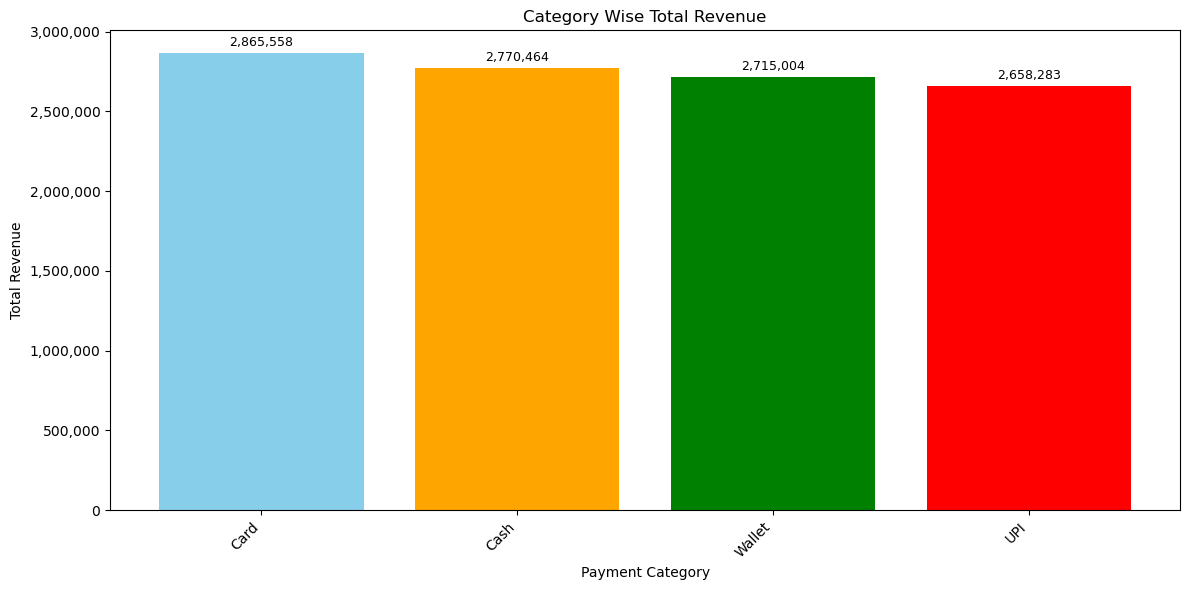

In [53]:
# Group by Payment and sum order total
category_revenue = final.groupby("payment_method")["order_total"].sum().reset_index()
# Sort by revenue for better visualization
category_revenue = category_revenue.sort_values(by="order_total", ascending=False)

colors = [ "skyblue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
plt.figure(figsize=(12,6))
bars = plt.bar(category_revenue["payment_method"], category_revenue["order_total"], color=colors)

#Add labels right after creating bars
plt.bar_label(bars, labels=[f"{val:,.0f}" for val in category_revenue["order_total"]], padding=3, fontsize=9)

# Format Y-axis to show full numbers with commas (no scientific notation)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45, ha="right")
plt.xlabel("Payment Category")
plt.ylabel("Total Revenue")
plt.title("Category Wise Total Revenue")
plt.tight_layout()
plt.show()


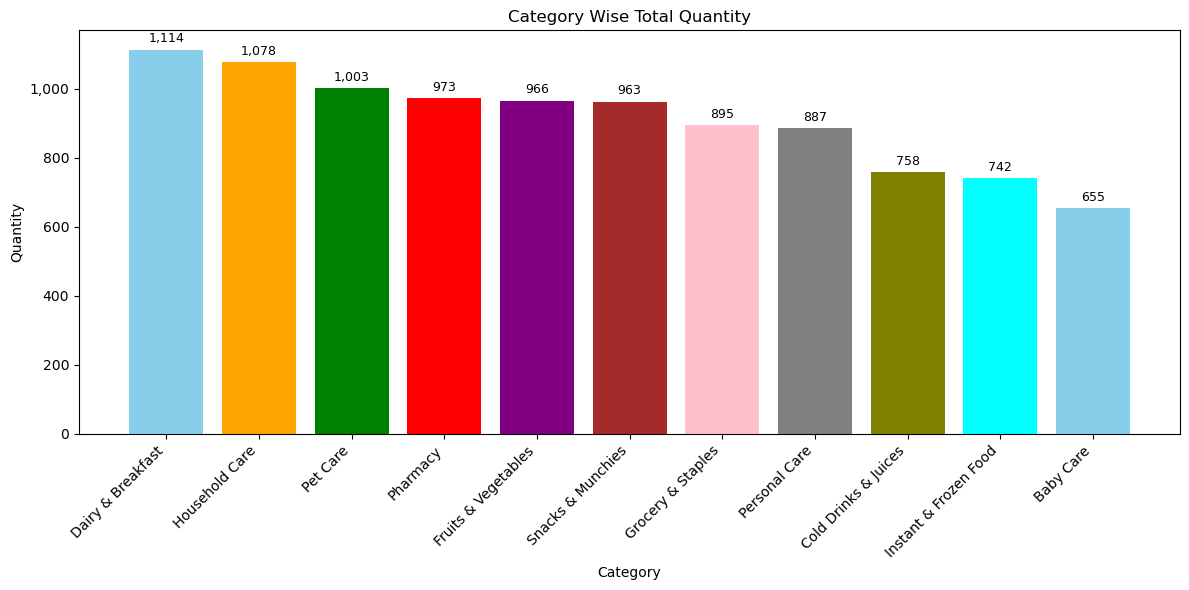

In [54]:
# Group by Payment and sum order total
category_revenue = final.groupby("category")["quantity"].sum().reset_index()
# Sort by revenue for better visualization
category_revenue = category_revenue.sort_values(by="quantity", ascending=False)

colors = [ "skyblue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
plt.figure(figsize=(12,6))
bars = plt.bar(category_revenue["category"], category_revenue["quantity"], color=colors)

#Add labels right after creating bars
plt.bar_label(bars, labels=[f"{val:,.0f}" for val in category_revenue["quantity"]], padding=3, fontsize=9)

# Format Y-axis to show full numbers with commas (no scientific notation)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45, ha="right")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Category Wise Total Quantity")
plt.tight_layout()
plt.show()

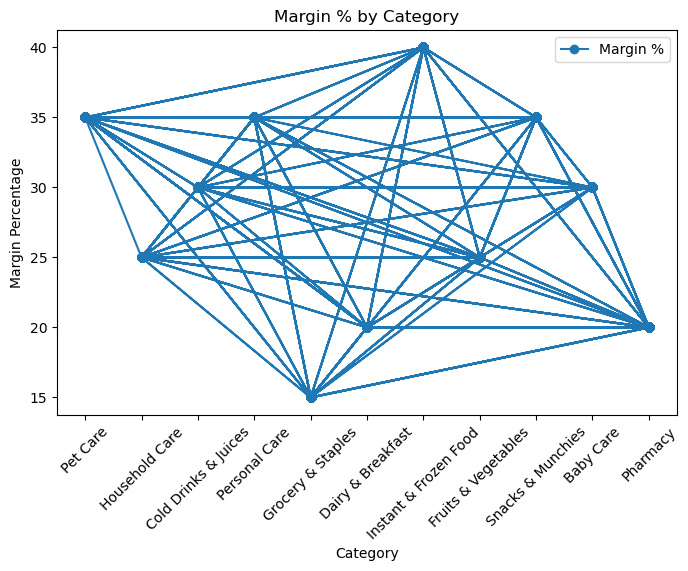

In [55]:
final['category'] = final['category'].astype(str)
plt.figure(figsize=(8,5))
plt.plot(final['category'], final['margin_percentage'], marker='o', label='Margin %')
plt.xlabel("Category")
plt.ylabel("Margin Percentage")
plt.title("Margin % by Category")
plt.legend(loc='best')
plt.xticks(rotation=45)   # rotate category names if long
plt.show()


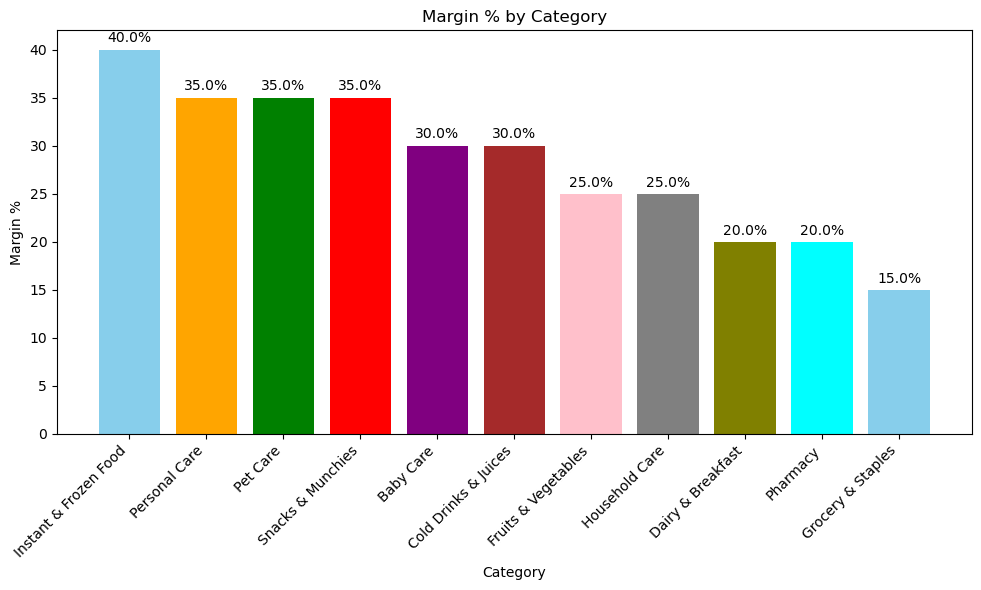

In [58]:
final['category'] = final['category'].astype(str)
# Group by category and calculate average margin %
category_margin = final.groupby("category")["margin_percentage"].mean().reset_index()

# Sort for cleaner view
category_margin = category_margin.sort_values(by="margin_percentage", ascending=False)

# Plot bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(category_margin["category"], category_margin["margin_percentage"], color=colors)

# Add labels on top of bars
plt.bar_label(bars, fmt="%.1f%%", padding=3)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Category")
plt.ylabel("Margin %")
plt.title("Margin % by Category")
plt.tight_layout()
plt.show()


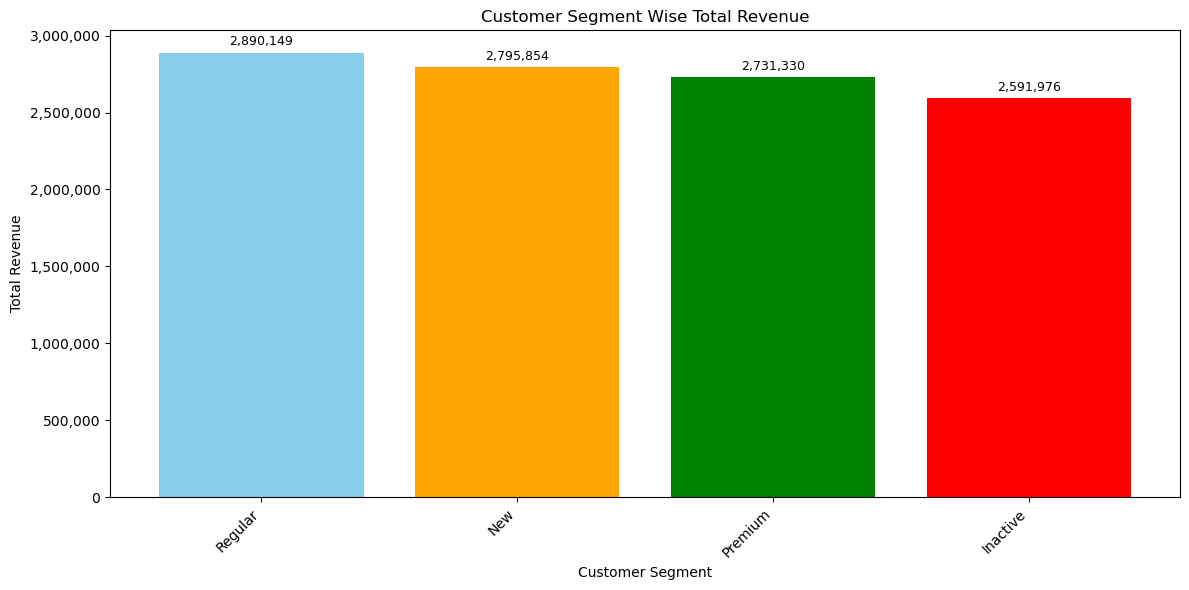

In [59]:
# Group by category and sum order total
category_revenue = final.groupby("customer_segment")["order_total"].sum().reset_index()
# Sort by revenue for better visualization
category_revenue = category_revenue.sort_values(by="order_total", ascending=False)

colors = [ "skyblue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
plt.figure(figsize=(12,6))
bars = plt.bar(category_revenue["customer_segment"], category_revenue["order_total"], color=colors)

#Add labels right after creating bars
plt.bar_label(bars, labels=[f"{val:,.0f}" for val in category_revenue["order_total"]], padding=3, fontsize=9)

# Format Y-axis to show full numbers with commas (no scientific notation)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45, ha="right")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.title("Customer Segment Wise Total Revenue")
plt.tight_layout()
plt.show()

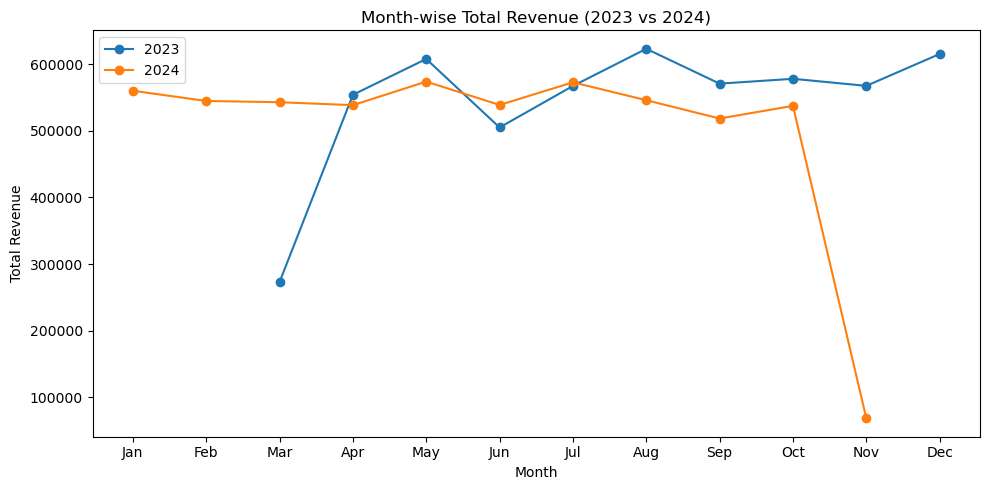

In [60]:
# Convert date column
final['date'] = pd.to_datetime(final['date'])

# Filter for each year
data_2023 = final[final['date'].dt.year == 2023]
data_2024 = final[final['date'].dt.year == 2024]

# Group by month
rev_2023 = data_2023.groupby(data_2023['date'].dt.month)['order_total'].sum()
rev_2024 = data_2024.groupby(data_2024['date'].dt.month)['order_total'].sum()

# Plot
plt.figure(figsize=(10,5))
plt.plot(rev_2023.index, rev_2023.values, marker='o', label="2023")
plt.plot(rev_2024.index, rev_2024.values, marker='o', label="2024")

plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Month-wise Total Revenue (2023 vs 2024)")
plt.legend()
plt.xticks(range(1,13), 
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.tight_layout()
plt.show()



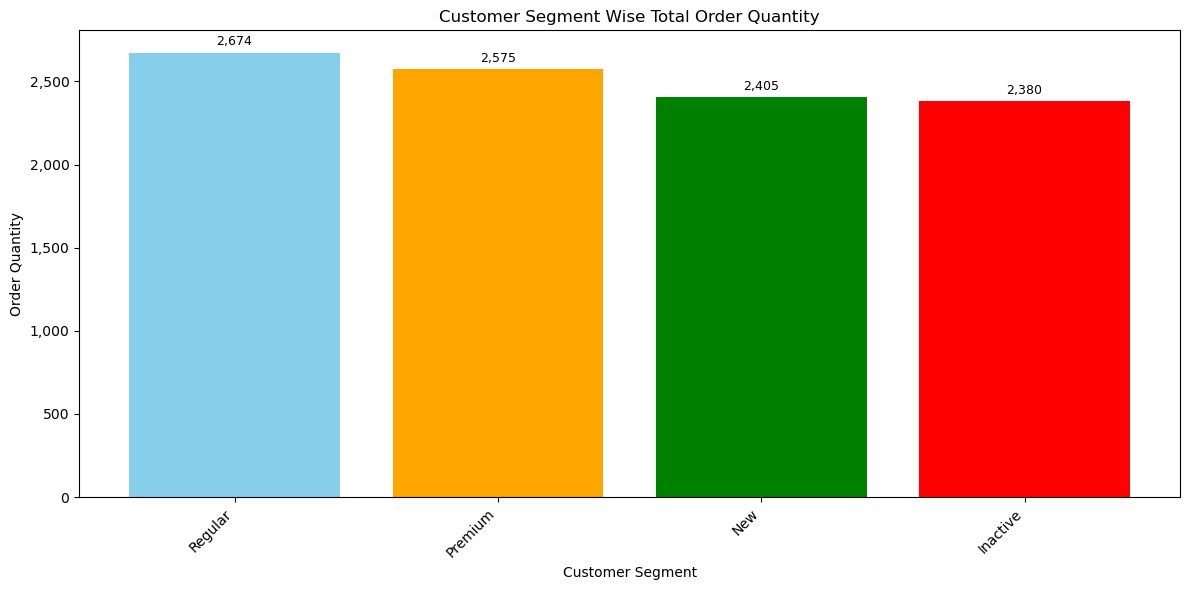

In [61]:
# Group by category and sum order total
category_revenue = final.groupby("customer_segment")["quantity"].sum().reset_index()
# Sort by revenue for better visualization
category_revenue = category_revenue.sort_values(by="quantity", ascending=False)

plt.figure(figsize=(12,6))
bars = plt.bar(category_revenue["customer_segment"], category_revenue["quantity"], color=colors)

#Add labels right after creating bars
plt.bar_label(bars, labels=[f"{val:,.0f}" for val in category_revenue["quantity"]], padding=3, fontsize=9)

# Format Y-axis to show full numbers with commas (no scientific notation)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45, ha="right")
plt.xlabel("Customer Segment")
plt.ylabel("Order Quantity")
plt.title("Customer Segment Wise Total Order Quantity")
plt.tight_layout()
plt.show()

In [62]:
inv=pd.merge(inv,df8, how='outer', on='product_id')

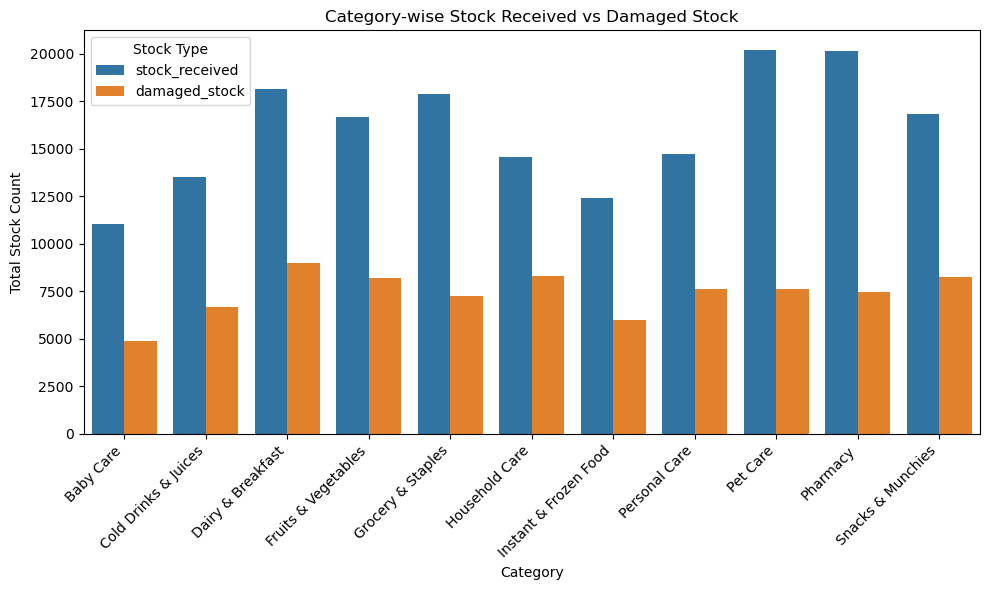

In [63]:
# Group data by category
category_summary = inv.groupby("category")[["stock_received", "damaged_stock"]].sum().reset_index()

# Melt the dataframe to long format (so seaborn can plot grouped bars)
category_melted = category_summary.melt(id_vars="category", 
                                        value_vars=["stock_received", "damaged_stock"], 
                                        var_name="Stock Type", 
                                        value_name="Count")

# Plot grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=category_melted, x="category", y="Count", hue="Stock Type")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Category")
plt.ylabel("Total Stock Count")
plt.title("Category-wise Stock Received vs Damaged Stock")
plt.tight_layout()
plt.show()


In [64]:
# KPI- Key Performance Indicator
print("Total Revenue:",final['order_total'].sum())
print("Max Revenune Order:",final['order_total'].max())
print("Average Of Revenune Per Order:",final['order_total'].sum()/5000)
print("Average Promised Minutes:",final['promised_minutes'].mean())
print("Average Time to Deliver Order:",final['actual_minutes'].mean())
print("Average Distance in k.m.:",final['distance_km'].mean())

Total Revenue: 11009308.5
Max Revenune Order: 6721.46
Average Of Revenune Per Order: 2201.8617
Average Promised Minutes: 14.9914
Average Time to Deliver Order: 19.4344
Average Distance in k.m.: 2.718048


In [65]:
#Save Final csv File
final.to_csv("final.csv", index=False)


🔎 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.49      0.60       762
           1       0.23      0.50      0.32       238

    accuracy                           0.49      1000
   macro avg       0.50      0.50      0.46      1000
weighted avg       0.63      0.49      0.53      1000



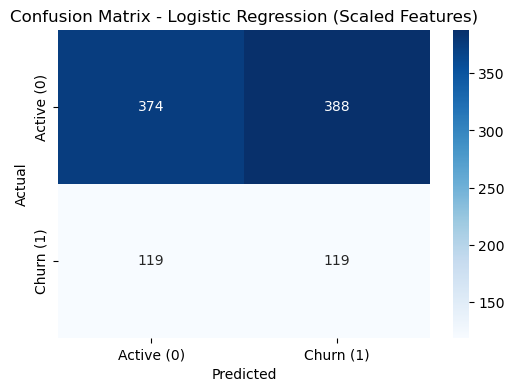

In [66]:
# Logistic Regression for Churn Prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load & Clean Data
df = pd.read_csv("final.csv")

# Drop duplicate rows if any
df = df.drop_duplicates()

# Drop rows with missing values (or alternatively impute)
df = df.dropna()

# Reset index
df.reset_index(drop=True, inplace=True)

# Step 2: Target Variable
df["churn"] = df["customer_segment"].apply(lambda x: 1 if x=="Inactive" else 0)

# Step 3: Feature Selection
features = ["order_total", "promised_minutes", "actual_minutes",
            "total_orders", "avg_order_value", "distance_km",
            "quantity", "margin_percentage",
            "payment_method", "sentiment", "category"]

X = df[features]
y = df["churn"]


# Step 4: One-Hot Encode Categoricals
cat_cols = ["payment_method", "sentiment", "category"]
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Feature Scaling (Normalization / Standardization)
scaler = StandardScaler()

# Fit only on training data, transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Logistic Regression Model
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test_scaled)

# Step 9: Evaluation
print("\n🔎 Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Active (0)", "Churn (1)"],
            yticklabels=["Active (0)", "Churn (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Scaled Features)")
plt.show()
